In [1]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing the price data (after removing the companies which... read the notepad)
price_data = pd.read_csv('../Assignment/data/price_data_updated2.csv')
price_data['Date'] = pd.to_datetime(price_data['Date'], dayfirst=True)
price_data.set_index('Date', inplace=True)
price_data

,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,DCMSHRIRAM,DELTACORP,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-01,1420.335571,401.056885,272.652924,677.731140,393.579956,10550.11133,558.678955,NaN,NaN,282.351288,144.947937,NaN,173.651474,541.986572,7879.600098,1142.636719,NaN,NaN,62.092960,16.850000,NaN,104.857414,371.125153,NaN,306.766571,29.960373,NaN,69.438110,89.768829,163.613525,NaN,1.839179,17.951935,145.034012,NaN,NaN,78.370209,NaN,97.378731,79.041595,...,NaN,301.561981,NaN,NaN,NaN,507.290436,359.691650,1048.927979,499.998016,NaN,112.289169,245.945801,NaN,746.890930,NaN,NaN,115.280724,591.351990,NaN,NaN,NaN,NaN,35.084396,NaN,191.990189,56.920753,120.229523,217.724014,NaN,146.606003,2147.560547,924.141418,188.016235,NaN,440.125732,409.910126,NaN,NaN,407.029633,22.930450
2015-04-06,1399.318115,397.305695,271.049774,695.930969,388.213287,10537.74707,567.920044,NaN,NaN,281.703003,150.057495,NaN,171.272736,563.589111,8144.399902,1167.106201,NaN,NaN,61.841408,16.900000,NaN,104.628555,369.043152,NaN,305.865265,30.341627,NaN,70.346069,88.323753,165.942413,NaN,1.952111,17.658588,142.796524,NaN,NaN,77.525002,NaN,109.292091,79.329536,...,NaN,305.897308,NaN,NaN,NaN,498.650971,365.852936,1074.436890,518.968933,NaN,113.840508,245.922089,NaN,714.810181,NaN,NaN,115.033600,580.512756,NaN,NaN,NaN,NaN,35.623634,NaN,191.944290,60.794472,122.757927,217.303619,NaN,145.766220,2242.705566,924.141418,192.399017,NaN,444.061035,399.718018,NaN,NaN,408.466980,22.881245
2015-04-07,1417.125977,398.371368,267.801422,690.578064,392.073486,10624.54590,560.123108,NaN,NaN,280.313690,152.982849,NaN,173.439117,562.251587,8609.900391,1144.142334,NaN,NaN,61.506004,17.700001,NaN,103.484329,367.954773,NaN,307.589600,30.119236,NaN,71.352707,86.783409,171.930984,NaN,1.899678,17.828506,141.230286,NaN,NaN,78.698898,NaN,107.608704,79.041595,...,NaN,309.617493,NaN,NaN,NaN,496.829590,358.657288,1076.406006,514.102051,NaN,114.844299,249.575928,NaN,714.810181,NaN,NaN,120.140717,562.238831,NaN,NaN,NaN,NaN,35.893257,NaN,195.800629,59.199413,126.376129,213.519943,NaN,146.686005,2577.530762,924.141418,200.376648,NaN,440.465820,410.605042,NaN,NaN,407.079132,22.586004
2015-04-08,1465.141602,408.729797,265.860840,682.984436,407.632233,10462.97070,561.272705,NaN,NaN,272.024200,157.655594,NaN,171.867416,572.474731,9298.750000,1162.259399,NaN,NaN,61.422146,17.350000,NaN,105.727028,366.440582,NaN,305.630127,30.055685,NaN,71.707985,88.276115,180.100571,NaN,1.907745,18.484133,140.603790,NaN,NaN,77.712822,NaN,111.320816,80.481331,...,NaN,313.712494,NaN,NaN,NaN,497.863342,371.384583,1081.043945,511.370636,NaN,115.619957,258.734253,NaN,717.667847,NaN,NaN,116.433945,563.089844,NaN,NaN,NaN,NaN,35.657341,NaN,204.798737,59.563992,126.245361,216.275955,NaN,151.884811,2665.705566,924.141418,200.081177,NaN,450.377014,420.611939,NaN,NaN,404.154846,23.176485
2015-04-09,1445.427368,410.988892,270.501343,712.363281,421.378357,10757.36719,559.673340,NaN,NaN,263.827332,157.542679,NaN,169.276230,560.732849,9297.799805,1174.023560,NaN,NaN,63.141129,17.299999,NaN,106.413559,366.700836,NaN,303.474792,29.928602,NaN,73.089638,91.340927,185.201935,NaN,1.911778,18.439247,143.736282,NaN,NaN,77.571953,NaN,117.752296,85.088493,...,NaN,315.481262,NaN,NaN,NaN,487.451721,382.942566,1040.089600,490.413238,NaN,115.939354,253.229721,NaN,722.138855,NaN,NaN,116.35

In [3]:
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
EICHERMOT,1728.0,2145.733841,436.584230,1251.827637,1773.263184,2121.919800,2542.830994,2939.598633
HCLTECH,1728.0,555.361008,251.832376,311.613769,385.700661,447.591202,566.590759,1304.195923
ICICIBANK,1728.0,378.311289,164.110433,157.058716,254.833237,322.642319,465.621780,836.679138
KOTAKBANK,1728.0,1227.896183,425.994072,598.600037,787.924179,1231.417725,1610.792358,2209.619629
RELIANCE,1728.0,1195.747155,664.688905,388.213287,515.368774,1077.605774,1817.339692,2723.649902
...,...,...,...,...,...,...,...,...
RELINFRA,1728.0,269.641540,202.960201,9.050000,46.387501,329.325012,455.313446,588.775635
SANSERA,129.0,732.844400,71.387345,561.648010,681.377808,753.185730,786.097717,848.431030
SHALBY,1059.0,131.257229,45.418924,42.067497,93.724998,129.563400,159.190521,262.123932
SHOPERSTOP,1728.0,367.064439,117.755878,125.633133,292.469788,368.929733,457.063118,659.440918


In [4]:
# NumPy array of companies that were listed after 1st April 2015
late_listed = price_data.columns.where(price_data.describe().iloc[0] < price_data.describe().iloc[0].max()).tolist()
late_listed = [item for item in late_listed if not(pd.isna(item)) == True]
late_listed

['BANDHANBNK',
 'HDFCAMC',
 'LTI',
 'AAVAS',
 'ABCAPITAL',
 'HAL',
 'LAURUSLABS',
 'NAM-INDIA',
 'SUMICHEM',
 'ANURAS',
 'ASTERDM',
 'CAMS',
 'MGL',
 'RBLBANK',
 'RAILTEL',
 'SIS',
 'THYROCARE',
 'ARVINDFASN',
 'CENTRUM',
 'CRAFTSMAN',
 'DOLATALGO',
 'FINOPB',
 'GTPL',
 'GRSE',
 'GREENPANEL',
 'NEWGEN',
 'RATEGAIN',
 'SANSERA',
 'SHALBY']

In [5]:
# Daily returns of stocks
returns_data = price_data.pct_change(1, fill_method=None)
returns_data

,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,DCMSHRIRAM,DELTACORP,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,-0.014798,-0.009353,-0.005880,0.026854,-0.013636,-0.001172,0.016541,NaN,NaN,-0.002296,0.035251,NaN,-0.013698,0.039858,0.033606,0.021415,NaN,NaN,-0.004051,0.002967,NaN,-0.002183,-0.005610,NaN,-0.002938,0.012725,NaN,0.013076,-0.016098,0.014234,NaN,0.061403,-0.016341,-0.015427,NaN,NaN,-0.010785,NaN,0.122340,0.003643,...,NaN,0.014376,NaN,NaN,NaN,-0.017031,0.017129,0.024319,0.037942,NaN,0.013816,-0.000096,NaN,-0.042952,NaN,NaN,-0.002144,-0.018330,NaN,NaN,NaN,NaN,0.015370,NaN,-0.000239,0.068055,0.021030,-0.001931,NaN,-0.005728,0.044304,0.000000,0.023311,NaN,0.008941,-0.024864,NaN,NaN,0.003531,-0.002146
2015-04-07,0.012726,0.002682,-0.011984,-0.007692,0.009944,0.008237,-0.013729,NaN,NaN,-0.004932,0.019495,NaN,0.012649,-0.002373,0.057156,-0.019676,NaN,NaN,-0.005424,0.047337,NaN,-0.010936,-0.002949,NaN,0.005638,-0.007330,NaN,0.014310,-0.017440,0.036088,NaN,-0.026860,0.009622,-0.010968,NaN,NaN,0.015142,NaN,-0.015403,-0.003630,...,NaN,0.012162,NaN,NaN,NaN,-0.003653,-0.019668,0.001833,-0.009378,NaN,0.008818,0.014858,NaN,0.000000,NaN,NaN,0.044397,-0.031479,NaN,NaN,NaN,NaN,0.007569,NaN,0.020091,-0.026237,0.029474,-0.017412,NaN,0.006310,0.149295,0.000000,0.041464,NaN,-0.008096,0.027237,NaN,NaN,-0.003398,-0.012903
2015-04-08,0.033882,0.026002,-0.007246,-0.010996,0.039683,-0.015208,0.002052,NaN,NaN,-0.029572,0.030544,NaN,-0.009062,0.018183,0.080007,0.015835,NaN,NaN,-0.001363,-0.019774,NaN,0.021672,-0.004115,NaN,-0.006370,-0.002110,NaN,0.004979,0.017200,0.047517,NaN,0.004247,0.036774,-0.004436,NaN,NaN,-0.012530,NaN,0.034496,0.018215,...,NaN,0.013226,NaN,NaN,NaN,0.002081,0.035486,0.004309,-0.005313,NaN,0.006754,0.036696,NaN,0.003998,NaN,NaN,-0.030854,0.001514,NaN,NaN,NaN,NaN,-0.006573,NaN,0.045955,0.006158,-0.001035,0.012908,NaN,0.035442,0.034209,0.000000,-0.001475,NaN,0.022502,0.024371,NaN,NaN,-0.007184,0.026144
2015-04-09,-0.013456,0.005527,0.017455,0.043015,0.033722,0.028137,-0.002850,NaN,NaN,-0.030133,-0.000716,NaN,-0.015077,-0.020511,-0.000102,0.010122,NaN,NaN,0.027986,-0.002882,NaN,0.006493,0.000710,NaN,-0.007052,-0.004228,NaN,0.019268,0.034718,0.028325,NaN,0.002114,-0.002428,0.022279,NaN,NaN,-0.001813,NaN,0.057774,0.057245,...,NaN,0.005638,NaN,NaN,NaN,-0.020913,0.031121,-0.037884,-0.040983,NaN,0.002762,-0.021275,NaN,0.006230,NaN,NaN,-0.000707,-0.031101,NaN,NaN,NaN,NaN,0.017013,NaN,0.025555,0.014537,-0.008287,-0.013175,NaN,0.199842,0.184008,0.000000,0.036180,NaN,0.027940,0.003635,NaN,NaN,-0.030537,0.016985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,-0.013842,-0.010695,-0.007029,0.004725,0.006670,-0.000619,-0.002539,0.009083,-0.015045,0.002094,-0.000706,0.0

------
## Outliers detection and removal from the 'returns_data' dataframe

In [6]:
print(returns_data.max().max())
print(returns_data.min().min())

0.3932149378369669
-0.6086956550364571


<AxesSubplot:ylabel='Count'>

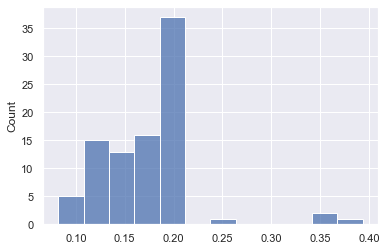

In [7]:
sns.histplot(returns_data.max())

<AxesSubplot:ylabel='Count'>

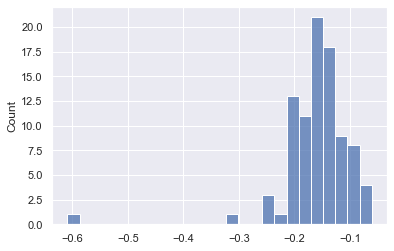

In [8]:
sns.histplot(returns_data.min())

0.04465336832130831
0.0176012507765004


<AxesSubplot:ylabel='Count'>

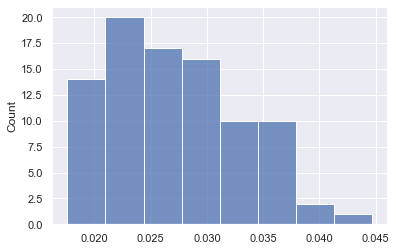

In [9]:
print(returns_data.std(ddof=1).max())
print(returns_data.std(ddof=1).min())
sns.histplot(returns_data.std(ddof=1))

Maximum Standard Deviation of 4.47% is still normal.

#### Standard Deviation is OK. But returns of certain stocks need rectification.

* #### Calculating 5th percentile of the lowest stock returns and 95th percentile of the highest stock returns

In [10]:
# Calculating the 5th percentile (Extreme price drops)

lower_min = returns_data.min().quantile([0.05])
lower_min = list(lower_min)[0]
print(lower_min)
returns_data.min()[returns_data.min() < lower_min]

-0.23921799243686734


BANDHANBNK   -0.250216
ASHOKLEY     -0.246275
JSL          -0.608696
ARVINDFASN   -0.247712
RELINFRA     -0.321012
dtype: float64

In [11]:
# Calculating the 95th percentile (Extreme price rises)

upper_max = returns_data.max().quantile([0.95])
upper_max = list(upper_max)[0]
print(upper_max)
returns_data.max()[returns_data.max() > upper_max]

0.20245695940633146


TATAMOTORS    0.204467
BANDHANBNK    0.393215
ASHOKLEY      0.243831
UNIONBANK     0.341705
RELINFRA      0.349355
dtype: float64

* #### Outlier removal from JSL stock price returns

['2015-11-19T00:00:00.000000000']
-0.07581433788506993


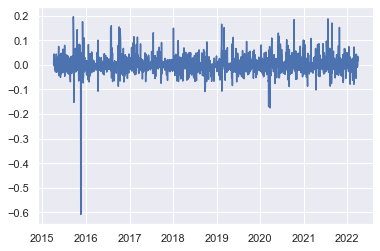

In [12]:
print(returns_data[returns_data['JSL'] == returns_data['JSL'].min()].index.values)
plt.plot(returns_data['JSL'])
# 1st percentile value of JSL's returns
print(list(returns_data['JSL'].quantile([0.01]))[0])

In [13]:
# Outlier removal 1A
# Winsorising the extreme price drop of JSL on 2015-11-19
print(returns_data['JSL'].loc['2015-11-19'])
returns_data['JSL'].loc['2015-11-19'] = list(returns_data['JSL'].quantile([0.01]))[0]
print(returns_data['JSL'].loc['2015-11-19'])

-0.6086956550364571
-0.07581433788506993


Date
2015-11-02   -0.065341
2015-11-03   -0.014184
2015-11-04    0.036999
2015-11-05   -0.036670
2015-11-06    0.084362
2015-11-09    0.015180
2015-11-10   -0.024299
2015-11-13    0.081418
2015-11-16    0.003543
2015-11-17    0.047661
2015-11-18   -0.050548
2015-11-19   -0.075814
2015-11-20    0.049887
2015-11-23    0.023758
2015-11-24   -0.037975
2015-11-26   -0.043860
2015-11-27   -0.020642
2015-11-30    0.049180
Name: JSL, dtype: float64


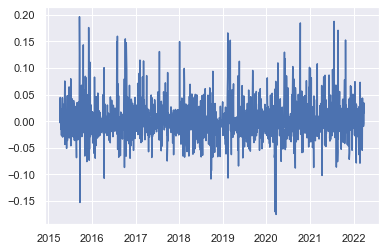

In [14]:
print(returns_data['JSL'].loc['2015-11-01' : '2015-11-30'])
plt.plot(returns_data['JSL'])

* #### Outlier removal from RELINFRA stock price returns

Similarly  for RELINFRA which not only has one of the highest price rise, but also has one of the lowest price drop (as shown in the above list of extreme price drops and price rises)

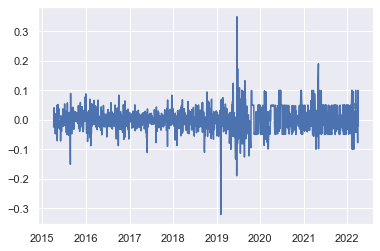

In [15]:
plt.plot(returns_data['RELINFRA'])

In [16]:
print(returns_data[returns_data['RELINFRA'] == returns_data['RELINFRA'].min()].index)
print(returns_data[returns_data['RELINFRA'] == returns_data['RELINFRA'].max()].index)

DatetimeIndex(['2019-02-06'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2019-06-20'], dtype='datetime64[ns]', name='Date', freq=None)


The price drop of 32.1012% on 6th February, 2019 and the price rise of 34.9355% on 20th June, 2019 are extraordinary, and therefore they would be *winsorised* for the analysis with 1st and 99th percentile values respectively.

In [17]:
# Calculating 1st and 99th percentiles of returns of RELINFRA
print(list(returns_data['RELINFRA'].quantile([0.01]))[0])
print(list(returns_data['RELINFRA'].quantile([0.99]))[0])

-0.09954674878105343
0.09946889138916304


In [18]:
# Winsorising the extreme price changes of RELINFRA

print(returns_data['RELINFRA'].loc['2019-02-06'])
print(returns_data['RELINFRA'].loc['2019-06-20'])

returns_data['RELINFRA'].loc['2019-02-06'] = list(returns_data['RELINFRA'].quantile([0.01]))[0]
returns_data['RELINFRA'].loc['2019-06-20'] = list(returns_data['RELINFRA'].quantile([0.99]))[0]

print(returns_data['RELINFRA'].loc['2019-02-06'])
print(returns_data['RELINFRA'].loc['2019-06-20'])

-0.3210120875687569
0.3493551506561927
-0.09954674878105343
0.09946889138916304


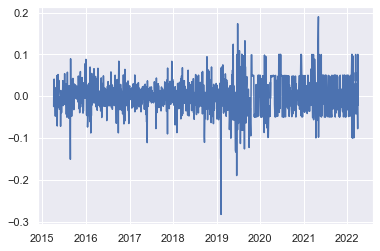

In [19]:
plt.plot(returns_data['RELINFRA'])

In [20]:
print(returns_data['RELINFRA'].min())
print(returns_data[returns_data['RELINFRA'] == returns_data['RELINFRA'].min()].index)

-0.28289047779027554
DatetimeIndex(['2019-02-07'], dtype='datetime64[ns]', name='Date', freq=None)


From the graph above, we can notice that on 7th February, 2019, right after the price drop of 32.1012% the previous day, there was another drop of 28.2890% which is another unusual extreme drop. Here too, *winsorisation* will be used to replace the 28.2890% drop with 1st percentile return of 'RELINFRA'.

In [21]:
# Winsorising the price drop on 2019-02-07 of 'RELINFRA'

print(returns_data['RELINFRA'].loc['2019-02-07'])

returns_data['RELINFRA'].loc['2019-02-07'] = list(returns_data['RELINFRA'].quantile([0.01]))[0]

print(returns_data['RELINFRA'].loc['2019-02-07'])

-0.28289047779027554
-0.09938652346970862


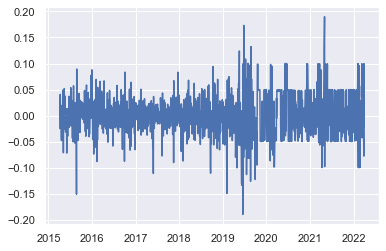

In [22]:
plt.plot(returns_data['RELINFRA'])

* #### Outlier removal from BANDHANBNK stock price returns

-0.2502158907194256
DatetimeIndex(['2020-03-23'], dtype='datetime64[ns]', name='Date', freq=None)
0.3932149378369669
DatetimeIndex(['2020-03-26'], dtype='datetime64[ns]', name='Date', freq=None)


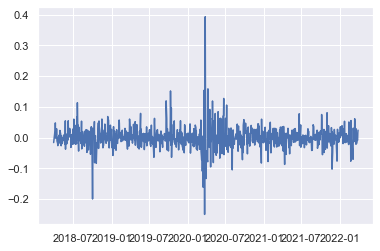

In [23]:
# Locating the extreme price changes of BANDHANBNK
plt.plot(returns_data['BANDHANBNK'])

print(returns_data['BANDHANBNK'].min())
print(returns_data[returns_data['BANDHANBNK'] == returns_data['BANDHANBNK'].min()].index)

print(returns_data['BANDHANBNK'].max())
print(returns_data[returns_data['BANDHANBNK'] == returns_data['BANDHANBNK'].max()].index)

Price returns for BANDHANBNK, in the month of March 2020 (the beginning month of the COVID lockdowns), the recorded changes of -25.0216% and 39.3215% of BANDHANBNK which are extreme in comparison to COVID lockdown slump in other stocks. These price changes need to be *winsorised*.

In [24]:
# Calculating 1st and 99th percentiles of returns of BANDHANBNK

print(list(returns_data['BANDHANBNK'].quantile([0.01]))[0])
print(list(returns_data['BANDHANBNK'].quantile([0.99]))[0])

-0.08837107486516017
0.09770676593657558


In [25]:
 # Winsorising the extreme price changes of BANDHANBNK

print(returns_data['BANDHANBNK'].loc['2020-03-23'])
print(returns_data['BANDHANBNK'].loc['2020-03-26'])

returns_data['BANDHANBNK'].loc['2020-03-23'] = list(returns_data['BANDHANBNK'].quantile([0.01]))[0]
returns_data['BANDHANBNK'].loc['2020-03-26'] = list(returns_data['BANDHANBNK'].quantile([0.99]))[0]

print(returns_data['BANDHANBNK'].loc['2020-03-23'])
print(returns_data['BANDHANBNK'].loc['2020-03-26'])

-0.2502158907194256
0.3932149378369669
-0.08837107486516017
0.09770676593657558


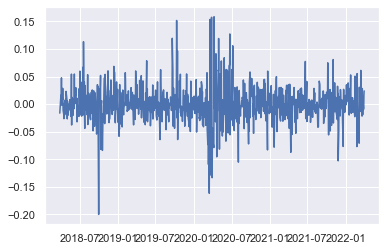

In [26]:
plt.plot(returns_data['BANDHANBNK'])

* #### Outlier removal from UNIONBANK stock price returns

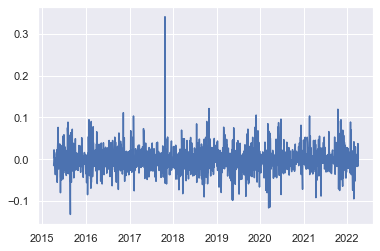

In [27]:
plt.plot(returns_data['UNIONBANK'])

In [28]:
# Locating the extraordinary single day return of UNIONBANK
print(returns_data['UNIONBANK'].max())
returns_data[returns_data['UNIONBANK'] == returns_data['UNIONBANK'].max()].index

0.3417047901639365


DatetimeIndex(['2017-10-25'], dtype='datetime64[ns]', name='Date', freq=None)

The largest one day return from UNIONBANK of 34.1705% was recorded on 25th October, 2017. It is a one-off single-day return from UNIONBANK and hence, it needs to be *winsorised* with a 99th percentile return of UNIONBANK.

In [29]:
# Winsorising the extreme price rise of 'UNIONBANK'
print(returns_data['UNIONBANK'].loc['2017-10-25'])
returns_data['UNIONBANK'].loc['2017-10-25'] = list(returns_data['UNIONBANK'].quantile([0.99]))[0]
print(returns_data['UNIONBANK'].loc['2017-10-25'])

0.3417047901639365
0.08690621158349836


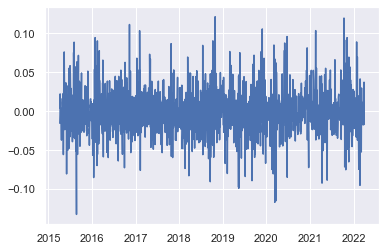

In [30]:
plt.plot(returns_data['UNIONBANK'])

<AxesSubplot:ylabel='Count'>

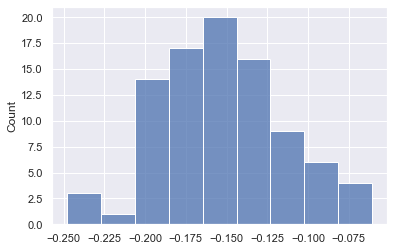

In [31]:
# Distribution of 'returns_data' after outlier removal
sns.histplot(returns_data.min())

<AxesSubplot:ylabel='Count'>

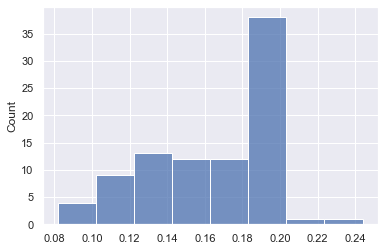

In [32]:
sns.histplot(returns_data.max())

-----
## Transforming the 'returns_data' dataframe into suitable form for analysis

In [33]:
# Inserting 'Quarter' & 'Year' column as per the 'April-to-March' Fiscal Year/Financial Year followed in India
returns_fiscal = returns_data.copy()
returns_fiscal.insert(loc=0, column='Quarter', value=returns_fiscal.index.to_period('Q-MAR'))
returns_fiscal.insert(loc=1, column='Year', value=returns_fiscal['Quarter'].dt.qyear)
returns_fiscal

,Quarter,Year,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-04-01,2016Q1,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,2016Q1,2016,-0.014798,-0.009353,-0.005880,0.026854,-0.013636,-0.001172,0.016541,NaN,NaN,-0.002296,0.035251,NaN,-0.013698,0.039858,0.033606,0.021415,NaN,NaN,-0.004051,0.002967,NaN,-0.002183,-0.005610,NaN,-0.002938,0.012725,NaN,0.013076,-0.016098,0.014234,NaN,0.061403,-0.016341,-0.015427,NaN,NaN,-0.010785,NaN,...,NaN,0.014376,NaN,NaN,NaN,-0.017031,0.017129,0.024319,0.037942,NaN,0.013816,-0.000096,NaN,-0.042952,NaN,NaN,-0.002144,-0.018330,NaN,NaN,NaN,NaN,0.015370,NaN,-0.000239,0.068055,0.021030,-0.001931,NaN,-0.005728,0.044304,0.000000,0.023311,NaN,0.008941,-0.024864,NaN,NaN,0.003531,-0.002146
2015-04-07,2016Q1,2016,0.012726,0.002682,-0.011984,-0.007692,0.009944,0.008237,-0.013729,NaN,NaN,-0.004932,0.019495,NaN,0.012649,-0.002373,0.057156,-0.019676,NaN,NaN,-0.005424,0.047337,NaN,-0.010936,-0.002949,NaN,0.005638,-0.007330,NaN,0.014310,-0.017440,0.036088,NaN,-0.026860,0.009622,-0.010968,NaN,NaN,0.015142,NaN,...,NaN,0.012162,NaN,NaN,NaN,-0.003653,-0.019668,0.001833,-0.009378,NaN,0.008818,0.014858,NaN,0.000000,NaN,NaN,0.044397,-0.031479,NaN,NaN,NaN,NaN,0.007569,NaN,0.020091,-0.026237,0.029474,-0.017412,NaN,0.006310,0.149295,0.000000,0.041464,NaN,-0.008096,0.027237,NaN,NaN,-0.003398,-0.012903
2015-04-08,2016Q1,2016,0.033882,0.026002,-0.007246,-0.010996,0.039683,-0.015208,0.002052,NaN,NaN,-0.029572,0.030544,NaN,-0.009062,0.018183,0.080007,0.015835,NaN,NaN,-0.001363,-0.019774,NaN,0.021672,-0.004115,NaN,-0.006370,-0.002110,NaN,0.004979,0.017200,0.047517,NaN,0.004247,0.036774,-0.004436,NaN,NaN,-0.012530,NaN,...,NaN,0.013226,NaN,NaN,NaN,0.002081,0.035486,0.004309,-0.005313,NaN,0.006754,0.036696,NaN,0.003998,NaN,NaN,-0.030854,0.001514,NaN,NaN,NaN,NaN,-0.006573,NaN,0.045955,0.006158,-0.001035,0.012908,NaN,0.035442,0.034209,0.000000,-0.001475,NaN,0.022502,0.024371,NaN,NaN,-0.007184,0.026144
2015-04-09,2016Q1,2016,-0.013456,0.005527,0.017455,0.043015,0.033722,0.028137,-0.002850,NaN,NaN,-0.030133,-0.000716,NaN,-0.015077,-0.020511,-0.000102,0.010122,NaN,NaN,0.027986,-0.002882,NaN,0.006493,0.000710,NaN,-0.007052,-0.004228,NaN,0.019268,0.034718,0.028325,NaN,0.002114,-0.002428,0.022279,NaN,NaN,-0.001813,NaN,...,NaN,0.005638,NaN,NaN,NaN,-0.020913,0.031121,-0.037884,-0.040983,NaN,0.002762,-0.021275,NaN,0.006230,NaN,NaN,-0.000707,-0.031101,NaN,NaN,NaN,NaN,0.017013,NaN,0.025555,0.014537,-0.008287,-0.013175,NaN,0.199842,0.184008,0.000000,0.036180,NaN,0.027940,0.003635,NaN,NaN,-0.030537,0.016985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,2022Q4,2022,-0.013842,-0.010695,-0.007029,0.004725,0.006670,-0.000619,-0.002539,0.009083,-0.015045,0.002094,-0.000706,0.000955,-0.031944,-0

In [34]:
# this dataframe will be required for the analysis later
returns_fiscal.to_csv('../Assignment/data/price_data_fiscal.csv')

In [35]:
returns_fiscal.set_index('Year', inplace=True)
returns_fiscal.drop(['Quarter'], axis=1, inplace=True)
returns_fiscal

,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,DCMSHRIRAM,DELTACORP,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-0.014798,-0.009353,-0.005880,0.026854,-0.013636,-0.001172,0.016541,NaN,NaN,-0.002296,0.035251,NaN,-0.013698,0.039858,0.033606,0.021415,NaN,NaN,-0.004051,0.002967,NaN,-0.002183,-0.005610,NaN,-0.002938,0.012725,NaN,0.013076,-0.016098,0.014234,NaN,0.061403,-0.016341,-0.015427,NaN,NaN,-0.010785,NaN,0.122340,0.003643,...,NaN,0.014376,NaN,NaN,NaN,-0.017031,0.017129,0.024319,0.037942,NaN,0.013816,-0.000096,NaN,-0.042952,NaN,NaN,-0.002144,-0.018330,NaN,NaN,NaN,NaN,0.015370,NaN,-0.000239,0.068055,0.021030,-0.001931,NaN,-0.005728,0.044304,0.000000,0.023311,NaN,0.008941,-0.024864,NaN,NaN,0.003531,-0.002146
2016,0.012726,0.002682,-0.011984,-0.007692,0.009944,0.008237,-0.013729,NaN,NaN,-0.004932,0.019495,NaN,0.012649,-0.002373,0.057156,-0.019676,NaN,NaN,-0.005424,0.047337,NaN,-0.010936,-0.002949,NaN,0.005638,-0.007330,NaN,0.014310,-0.017440,0.036088,NaN,-0.026860,0.009622,-0.010968,NaN,NaN,0.015142,NaN,-0.015403,-0.003630,...,NaN,0.012162,NaN,NaN,NaN,-0.003653,-0.019668,0.001833,-0.009378,NaN,0.008818,0.014858,NaN,0.000000,NaN,NaN,0.044397,-0.031479,NaN,NaN,NaN,NaN,0.007569,NaN,0.020091,-0.026237,0.029474,-0.017412,NaN,0.006310,0.149295,0.000000,0.041464,NaN,-0.008096,0.027237,NaN,NaN,-0.003398,-0.012903
2016,0.033882,0.026002,-0.007246,-0.010996,0.039683,-0.015208,0.002052,NaN,NaN,-0.029572,0.030544,NaN,-0.009062,0.018183,0.080007,0.015835,NaN,NaN,-0.001363,-0.019774,NaN,0.021672,-0.004115,NaN,-0.006370,-0.002110,NaN,0.004979,0.017200,0.047517,NaN,0.004247,0.036774,-0.004436,NaN,NaN,-0.012530,NaN,0.034496,0.018215,...,NaN,0.013226,NaN,NaN,NaN,0.002081,0.035486,0.004309,-0.005313,NaN,0.006754,0.036696,NaN,0.003998,NaN,NaN,-0.030854,0.001514,NaN,NaN,NaN,NaN,-0.006573,NaN,0.045955,0.006158,-0.001035,0.012908,NaN,0.035442,0.034209,0.000000,-0.001475,NaN,0.022502,0.024371,NaN,NaN,-0.007184,0.026144
2016,-0.013456,0.005527,0.017455,0.043015,0.033722,0.028137,-0.002850,NaN,NaN,-0.030133,-0.000716,NaN,-0.015077,-0.020511,-0.000102,0.010122,NaN,NaN,0.027986,-0.002882,NaN,0.006493,0.000710,NaN,-0.007052,-0.004228,NaN,0.019268,0.034718,0.028325,NaN,0.002114,-0.002428,0.022279,NaN,NaN,-0.001813,NaN,0.057774,0.057245,...,NaN,0.005638,NaN,NaN,NaN,-0.020913,0.031121,-0.037884,-0.040983,NaN,0.002762,-0.021275,NaN,0.006230,NaN,NaN,-0.000707,-0.031101,NaN,NaN,NaN,NaN,0.017013,NaN,0.025555,0.014537,-0.008287,-0.013175,NaN,0.199842,0.184008,0.000000,0.036180,NaN,0.027940,0.003635,NaN,NaN,-0.030537,0.016985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,-0.013842,-0.010695,-0.007029,0.004725,0.006670,-0.000619,-0.002539,0.009083,-0.015045,0.002094,-0.000706,0.000955,-0.031944,-0.030141,-0.006583,

In [36]:
# Calculating mean of daily returns according to financial years
returns_annual = returns_fiscal.groupby(returns_fiscal.index).mean()
returns_annual

,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,DCMSHRIRAM,DELTACORP,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,0.001008,-0.000315,-0.000966,0.000152,0.001162,0.000802,-0.001172,NaN,NaN,0.000500,-0.000284,NaN,-0.000169,0.000816,0.001560,-0.000745,NaN,NaN,0.001860,-0.000980,NaN,-0.000397,0.001001,NaN,0.001347,-0.000272,NaN,0.001670,-0.001386,0.000706,NaN,0.004277,0.002942,-0.000196,NaN,NaN,0.004046,NaN,0.001379,-0.000388,...,NaN,0.000037,NaN,NaN,NaN,-0.000320,-0.001192,-0.000030,-0.001944,NaN,0.002012,-0.000536,NaN,-0.001032,NaN,NaN,0.000672,-0.000097,NaN,NaN,NaN,NaN,-0.001517,NaN,0.003539,0.001720,0.001342,-0.002890,NaN,0.001308,-0.000243,-0.000428,-0.000461,NaN,-0.000205,0.001309,NaN,NaN,-0.000296,-0.002314
2017,0.001335,0.000520,0.000918,0.001083,0.001045,0.001492,0.001019,NaN,NaN,0.001717,-0.000263,0.000263,0.003406,0.000789,0.000474,0.002305,NaN,NaN,-0.000781,0.001592,NaN,0.001200,0.001011,0.001226,0.000957,0.003317,NaN,0.002143,0.002522,0.001540,NaN,0.002594,0.003541,0.001110,NaN,NaN,0.003445,NaN,0.003583,0.004740,...,0.003230,0.001916,0.003722,NaN,NaN,0.001957,0.001202,0.000266,0.000610,0.000968,0.002237,0.001707,NaN,0.000981,NaN,NaN,0.002664,0.001389,NaN,NaN,NaN,NaN,0.002873,NaN,0.000015,0.001203,0.003587,0.002869,NaN,0.001338,0.000893,0.002558,0.003397,NaN,0.002113,0.000573,NaN,NaN,0.000180,0.002417
2018,0.000549,0.000552,0.000600,0.000811,0.001309,-0.000078,-0.001293,-0.016357,NaN,0.000368,0.003263,0.002828,0.000748,-0.000692,0.002309,-0.000249,NaN,-0.003228,0.002439,0.000798,NaN,0.000560,0.000065,0.000025,0.001760,0.000003,-0.001002,0.000744,-0.001690,0.001205,NaN,-0.001188,0.003829,-0.002601,NaN,-0.002672,0.002060,NaN,0.001805,0.001876,...,0.000468,0.000798,0.000019,NaN,0.002826,-0.001037,0.002027,-0.001821,0.001072,-0.000608,0.001117,-0.000168,NaN,0.003228,NaN,NaN,0.000760,-0.001314,NaN,NaN,-0.000742,NaN,0.002159,NaN,-0.000670,0.001396,-0.000506,0.002575,-0.001898,0.002384,-0.000972,0.000885,0.001567,NaN,0.001720,-0.000791,NaN,-0.001699,0.001806,0.000806
2019,-0.000989,0.000644,0.001728,0.001134,0.001932,0.000661,-0.002300,0.000882,-0.000912,0.002055,0.001180,0.001228,0.001899,0.001955,0.001046,0.001155,0.003283,-0.001397,-0.001544,0.001037,-0.001565,0.000845,0.000278,-0.000723,0.000911,-0.000165,-0.000269,0.000569,0.001683,0.000807,NaN,0.001163,0.000076,0.000535,NaN,-0.000203,-0.000115,NaN,0.000667,0.000587,...,0.000601,-0.000390,0.001619,NaN,-0.000855,-0.000943,0.000072,-0.000611,-0.002274,-0.000345,-0.001519,0.000960,0.039646,-0.000118,-0.002246,NaN,-0.002597,-0.001083,NaN,NaN,-0.002230,0.002074,-0.002795,NaN,-0.000277,-0.001368,-0.001133,-0.000325,0.001604,-0.000345,-0.001794,-0.000567,0.002594,NaN,-0.000208,-0.001993,NaN,-0.001675,-0.000310,0.004201
2020,-0.001147,-0.000667,-0.000515,0.000111,-0.000452,0.000071,-0.002766,-0.003262,0.001761,-0.001617,0.000429,-0.000311,0.000658,0.000312,-0.000725,-0.000782,0.000777,-0.003020,-0.001849,-0.000460,-0.000873,-0.002522,-0.001403,-0.000549,-0.001201,-0.001808,0.001573,-0.000467,-0.000290,0.002093,-0.000601,-0.001182,-0.000905,-0.004415,NaN,-0.001509,-0.001852,NaN,-0.001946,-0.004882,...,-0.000494,0.000423,-0.005513,NaN,0.000479,-0.000737,-0.004691,-0.000858,-0.002061,0.000312,-0.001330,0.000843,-0.007180,-0.004279,-0.004548,NaN,-0.001661,-0.000240,-0.000194,NaN,-0.001213,0.002271,-0.002216,-0.002321,-0.000251,-0.00232

In [37]:
# listing out trading days in a year since 2016
price_data.groupby(returns_fiscal.index).count().T.max()

# Average trading days in a year
print(round(price_data.groupby(returns_fiscal.index).count().T.max().mean(),0))

247.0


In [38]:
# No. of trading days in a year of stocks that were listed after 1st April 2015
price_data[late_listed].groupby(returns_fiscal.index).count()

,BANDHANBNK,HDFCAMC,LTI,AAVAS,ABCAPITAL,HAL,LAURUSLABS,NAM-INDIA,SUMICHEM,ANURAS,ASTERDM,CAMS,MGL,RBLBANK,RAILTEL,SIS,THYROCARE,ARVINDFASN,CENTRUM,CRAFTSMAN,DOLATALGO,FINOPB,GTPL,GRSE,GREENPANEL,NEWGEN,RATEGAIN,SANSERA,SHALBY
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017,0,0,172,0,0,0,72,0,0,0,0,0,185,144,0,0,223,0,0,0,0,0,0,0,0,0,0,0,0
2018,2,0,246,0,143,0,246,99,0,0,22,0,246,246,0,157,246,0,0,0,0,0,184,0,0,41,0,0,70
2019,246,157,246,117,246,246,246,246,0,0,246,0,246,246,0,246,246,14,244,0,0,0,246,106,0,246,0,0,246
2020,246,246,246,246,246,246,246,246,45,0,246,0,246,246,0,246,246,246,246,0,153,0,246,246,111,246,0,0,246
2021,249,249,249,249,249,249,249,249,249,5,249,123,249,249,22,249,249,249,249,4,249,0,249,249,249,249,0,0,249
2022,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,96,248,248,248,248,72,129,248


Average trading days in a year is **247 days** and 6-month equivalent of 247 days is 6/12 of 247 days = Approximately **124 days**. So, for the stocks that had less than 124 days of trading days (6 months of trading period) in the listing year, their listing year average return and standard deviation would be masked (i.e. their data will be ignored), since those returns would less reflect the returns of the whole financial year. Following is the list of stocks whose listing year average return and standard deviation will to be ignored:  

| Stock | Listing Year (Financial Year) | No. of trading days in the listing year |
| :- | :-: | :-: |
| **BANDHANBNK** | 2018 | 2 |
| **AAVAS** | 2019 | 117 |
| **LAURUSLABS** | 2017 | 72 |
| **NAM-INDIA** | 2018 | 99 |
| **SUMICHEM** | 2020 | 45 |
| **ANURAS** | 2021 | 5 |
| **ASTERDM** | 2018 | 22 |
| **CAMS** | 2021 | 123 |
| **RAILTEL** | 2021 | 22 |
| **ARVINDFASN** | 2019 | 14 |
| **CRAFTSMAN** | 2021 | 4 |
| **FINOPB** | **2022** | 96 |
| **GRSE** | 2019 | 106 |
| **GREENPANEL** | 2020 | 111 |
| **NEWGEN** | 2018 | 41 |
| **RATEGAIN** | **2022** | 72 |
| **SHALBY** | 2018 | 70 |

This also means, price returns of the stocks 'FINOPB' and 'RATEGAIN' would be completely ignored for the analysis.

In [39]:
# List of companies whose listing year data is to be ignored
ignore_listingyear = ['BANDHANBNK','AAVAS','LAURUSLABS','NAM-INDIA','SUMICHEM','ANURAS','ASTERDM','CAMS','RAILTEL','ARVINDFASN','CRAFTSMAN','FINOPB','GRSE','GREENPANEL','NEWGEN','RATEGAIN','SHALBY']
ignore_listingyear

['BANDHANBNK',
 'AAVAS',
 'LAURUSLABS',
 'NAM-INDIA',
 'SUMICHEM',
 'ANURAS',
 'ASTERDM',
 'CAMS',
 'RAILTEL',
 'ARVINDFASN',
 'CRAFTSMAN',
 'FINOPB',
 'GRSE',
 'GREENPANEL',
 'NEWGEN',
 'RATEGAIN',
 'SHALBY']

In [40]:
len(ignore_listingyear)

17

In [41]:
list_yr = []
for stock in ignore_listingyear:
    yer = returns_annual[stock].first_valid_index()
    list_yr.append(yer)
    
list_yr

[2018,
 2019,
 2017,
 2018,
 2020,
 2021,
 2018,
 2021,
 2021,
 2019,
 2021,
 2022,
 2019,
 2020,
 2018,
 2022,
 2018]

In [42]:
len(list_yr)

17

In [43]:
# Above list of companies along with their listing years
late_listed_ignore = list(zip(list_yr,ignore_listingyear))
late_listed_ignore

[(2018, 'BANDHANBNK'),
 (2019, 'AAVAS'),
 (2017, 'LAURUSLABS'),
 (2018, 'NAM-INDIA'),
 (2020, 'SUMICHEM'),
 (2021, 'ANURAS'),
 (2018, 'ASTERDM'),
 (2021, 'CAMS'),
 (2021, 'RAILTEL'),
 (2019, 'ARVINDFASN'),
 (2021, 'CRAFTSMAN'),
 (2022, 'FINOPB'),
 (2019, 'GRSE'),
 (2020, 'GREENPANEL'),
 (2018, 'NEWGEN'),
 (2022, 'RATEGAIN'),
 (2018, 'SHALBY')]

In [44]:
returns_annual[ignore_listingyear]

,BANDHANBNK,AAVAS,LAURUSLABS,NAM-INDIA,SUMICHEM,ANURAS,ASTERDM,CAMS,RAILTEL,ARVINDFASN,CRAFTSMAN,FINOPB,GRSE,GREENPANEL,NEWGEN,RATEGAIN,SHALBY
Year,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,0.001226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,-0.016357,NaN,0.000025,-0.001002,NaN,NaN,-0.002672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001898,NaN,-0.001699
2019,0.000882,0.003283,-0.000723,-0.000269,NaN,NaN,-0.000203,NaN,NaN,0.039646,NaN,NaN,0.002074,NaN,0.001604,NaN,-0.001675
2020,-0.003262,0.000777,-0.000549,0.001573,-0.000601,NaN,-0.001509,NaN,NaN,-0.007180,NaN,NaN,0.002271,-0.002321,-0.003906,NaN,-0.003554
2021,0.002690,0.003238,0.007518,0.001627,0.002110,-0.017890,0.001823,0.002501,0.004644,0.000297,-0.003143,NaN,0.001774,0.007468,0.004386,NaN,0.003815
2022,-0.000060,0.000519,0.002269,0.000367,0.002004,0.002347,0.001792,0.001304,-0.001357,0.003449,0.002343,-0.007454,0.001293,0.005657,0.002435,0.00072,0.001064


In [45]:
# Outlier removal
# Removing mean returns in listing years of the above stocks
for year_n_stock in late_listed_ignore:
    returns_annual.loc[tuple(year_n_stock)] = np.nan

returns_annual[ignore_listingyear]

,BANDHANBNK,AAVAS,LAURUSLABS,NAM-INDIA,SUMICHEM,ANURAS,ASTERDM,CAMS,RAILTEL,ARVINDFASN,CRAFTSMAN,FINOPB,GRSE,GREENPANEL,NEWGEN,RATEGAIN,SHALBY
Year,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,0.000025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.000882,NaN,-0.000723,-0.000269,NaN,NaN,-0.000203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001604,NaN,-0.001675
2020,-0.003262,0.000777,-0.000549,0.001573,NaN,NaN,-0.001509,NaN,NaN,-0.007180,NaN,NaN,0.002271,NaN,-0.003906,NaN,-0.003554
2021,0.002690,0.003238,0.007518,0.001627,0.002110,NaN,0.001823,NaN,NaN,0.000297,NaN,NaN,0.001774,0.007468,0.004386,NaN,0.003815
2022,-0.000060,0.000519,0.002269,0.000367,0.002004,0.002347,0.001792,0.001304,-0.001357,0.003449,0.002343,NaN,0.001293,0.005657,0.002435,NaN,0.001064


----
## Generating a dataframe of volatility (risk) of stocks from the 'returns_data' dataframe

In [46]:
# Calculating mean of daily standard deviations according to financial years
risks_annual = returns_fiscal.groupby(returns_fiscal.index).std(ddof=1)
risks_annual

,EICHERMOT,HCLTECH,ICICIBANK,KOTAKBANK,RELIANCE,SHREECEM,TATAMOTORS,BANDHANBNK,HDFCAMC,HAVELLS,JUBLFOOD,LTI,MUTHOOTFIN,TORNTPHARM,3MINDIA,AIAENG,AAVAS,ABCAPITAL,ASHOKLEY,GMRINFRA,HAL,INDHOTEL,KAJARIACER,LAURUSLABS,MPHASIS,NATIONALUM,NAM-INDIA,PETRONET,PFC,RELAXO,SUMICHEM,TRIDENT,UNOMINDA,UNIONBANK,ANURAS,ASTERDM,BALAMINES,CAMS,DCMSHRIRAM,DELTACORP,...,MGL,NESCO,RBLBANK,RAILTEL,SIS,SHILPAMED,SOBHA,STAR,SPARC,THYROCARE,UFLEX,AMRUTANJAN,ARVINDFASN,AUTOAXLES,CENTRUM,CRAFTSMAN,DEEPAKFERT,DHANUKA,DOLATALGO,FINOPB,GTPL,GRSE,GEOJITFSL,GREENPANEL,JINDALPOLY,KCP,KSL,KOLTEPATIL,NEWGEN,NUCLEUS,ORISSAMINE,PILANIINVS,PUNJABCHEM,RATEGAIN,RAYMOND,RELINFRA,SANSERA,SHALBY,SHOPERSTOP,USHAMART
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,0.022409,0.018985,0.021765,0.017212,0.017954,0.022387,0.025827,NaN,NaN,0.020113,0.024659,NaN,0.019650,0.020906,0.024845,0.020962,NaN,NaN,0.023121,0.032893,NaN,0.020162,0.017839,NaN,0.022710,0.023005,NaN,0.018784,0.026531,0.025787,NaN,0.042885,0.032896,0.031987,NaN,NaN,0.043475,NaN,0.029651,0.032187,...,NaN,0.017368,NaN,NaN,NaN,0.029607,0.023351,0.027158,0.025313,NaN,0.032172,0.024453,NaN,0.023119,NaN,NaN,0.020896,0.023778,NaN,NaN,NaN,NaN,0.026841,NaN,0.036199,0.030801,0.033058,0.027411,NaN,0.041136,0.029416,0.017963,0.041073,NaN,0.020764,0.029851,NaN,NaN,0.019517,0.033890
2017,0.018358,0.014514,0.020104,0.012362,0.014062,0.018549,0.022871,NaN,NaN,0.018942,0.024621,0.010469,0.028733,0.017967,0.018672,0.018492,NaN,NaN,0.019542,0.024096,NaN,0.019188,0.019729,0.021085,0.016750,0.029076,NaN,0.019581,0.020724,0.023398,NaN,0.027240,0.024184,0.026062,NaN,NaN,0.026634,NaN,0.029877,0.035649,...,0.018123,0.016217,0.020482,NaN,NaN,0.026518,0.023301,0.020126,0.020909,0.016226,0.023985,0.023755,NaN,0.020269,NaN,NaN,0.027549,0.018667,NaN,NaN,NaN,NaN,0.022165,NaN,0.023770,0.024227,0.031878,0.032994,NaN,0.027468,0.027758,0.019077,0.032895,NaN,0.023870,0.022717,NaN,NaN,0.017895,0.038972
2018,0.015246,0.012878,0.018117,0.011185,0.014183,0.016113,0.017125,NaN,NaN,0.017302,0.021830,0.019134,0.022297,0.017429,0.020509,0.016290,NaN,0.019886,0.018592,0.034404,NaN,0.020099,0.015811,0.015683,0.017241,0.025091,0.022056,0.017140,0.021000,0.018712,NaN,0.023270,0.022669,0.024870,NaN,0.032612,0.030145,NaN,0.023287,0.033423,...,0.016610,0.016372,0.016041,NaN,0.024556,0.022405,0.029315,0.018431,0.027022,0.012876,0.022102,0.018484,NaN,0.023180,NaN,NaN,0.023962,0.017261,NaN,NaN,0.027444,NaN,0.026785,NaN,0.023803,0.028044,0.021944,0.033746,0.021503,0.026450,0.019989,0.015111,0.022705,NaN,0.024465,0.024255,NaN,0.029442,0.025382,0.035508
2019,0.021811,0.017717,0.019353,0.016128,0.017255,0.017366,0.025711,0.029281,0.018130,0.019511,0.022289,0.023252,0.022918,0.016644,0.018940,0.017132,0.023628,0.020002,0.024977,0.026267,0.021700,0.019039,0.021065,0.016757,0.023132,0.026871,0.029783,0.017900,0.028299,0.014121,NaN,0.029010,0.024139,0.028769,NaN,0.019068,0.027623,NaN,0.036871,0.027903,...,0.015649,0.015587,0.017940,NaN,0.021787,0.022968,0.021687,0.033119,0.029007,0.017492,0.025852,0.029110,0.034181,0.025647,0.030151,NaN,0.027304,0.021324,NaN,NaN,0.034260,0.023389,0.026049,NaN,0.032355,0.023622,0.021448,0.026576,0.022429,0.022471,0.035007,0.017952,0.023674,NaN,0.023036,0.032199,NaN,0.021652,0.019740,0.043226
2020,0.027138,0.018570,0.025316,0.022080,0.026029,0.020450,0.039974,0.037748,0.028264,0.019881,0.027305,0.022688,0.030370,0.019615,0.023162,0.022571,0.029521,0.029161,0.037668,0.026670,0.020456,0.025501,0.023641,0.021236,0.019898,0.026776,0.035855,0.019987,0.027714,0.021884,0.050008,0.030715,0.029337,0.032142,NaN,0.029736,0.039576,NaN,0.033397,0.036246,...,0.026061,0.025477,0.043797,NaN,0.028347,0.035730,0.029554,0.030672,0.039904,0.025154,0.026632,0.032826,0.035919,0.030620,0.035117,NaN,0.038199,0.026043,0.044654,NaN,0.039525,0.034613,0.027013,0.041545,0.030743,0.030163,0.029765,0.035773,0.032787,0.020848,0.043675,0.022456,0.030147,NaN,0.031306,0.053282,NaN,0.034645,0.024065,0.035540
2021,0.023537,0.02262

In [47]:
# Volatility of stocks whose listing year data is to be ignored
risks_annual[ignore_listingyear]

,BANDHANBNK,AAVAS,LAURUSLABS,NAM-INDIA,SUMICHEM,ANURAS,ASTERDM,CAMS,RAILTEL,ARVINDFASN,CRAFTSMAN,FINOPB,GRSE,GREENPANEL,NEWGEN,RATEGAIN,SHALBY
Year,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,0.021085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,0.015683,0.022056,NaN,NaN,0.032612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021503,NaN,0.029442
2019,0.029281,0.023628,0.016757,0.029783,NaN,NaN,0.019068,NaN,NaN,0.034181,NaN,NaN,0.023389,NaN,0.022429,NaN,0.021652
2020,0.037748,0.029521,0.021236,0.035855,0.050008,NaN,0.029736,NaN,NaN,0.035919,NaN,NaN,0.034613,0.041545,0.032787,NaN,0.034645
2021,0.036175,0.027682,0.033135,0.025761,0.023796,0.035259,0.026565,0.018296,0.070720,0.032202,0.043124,NaN,0.030507,0.032636,0.028080,NaN,0.036664
2022,0.025230,0.023766,0.023950,0.018387,0.022476,0.021884,0.025947,0.026317,0.020287,0.034277,0.024453,0.035721,0.026904,0.028206,0.028704,0.044653,0.029982


We can observe that BANDHANBNK's listing year (2018) standard deviation is NaN (Null). This is because in the financial year 2017-18, it was only listed for 2 days i.e. there's only single price change for BANDHANBNK in the Financial Year 2018, which resulted in showing no standard deviation for that year.
  
But for the other stocks in the *late_listed_ignore* list, their listing year standard deviations have to be ignored.

In [48]:
# Outlier removal
# Removing average standard deviation of the listing years for the above listed stocks
for year_n_stock in late_listed_ignore:
    risks_annual.loc[tuple(year_n_stock)] = np.nan

risks_annual[ignore_listingyear]

,BANDHANBNK,AAVAS,LAURUSLABS,NAM-INDIA,SUMICHEM,ANURAS,ASTERDM,CAMS,RAILTEL,ARVINDFASN,CRAFTSMAN,FINOPB,GRSE,GREENPANEL,NEWGEN,RATEGAIN,SHALBY
Year,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,0.015683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,0.029281,NaN,0.016757,0.029783,NaN,NaN,0.019068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022429,NaN,0.021652
2020,0.037748,0.029521,0.021236,0.035855,NaN,NaN,0.029736,NaN,NaN,0.035919,NaN,NaN,0.034613,NaN,0.032787,NaN,0.034645
2021,0.036175,0.027682,0.033135,0.025761,0.023796,NaN,0.026565,NaN,NaN,0.032202,NaN,NaN,0.030507,0.032636,0.028080,NaN,0.036664
2022,0.025230,0.023766,0.023950,0.018387,0.022476,0.021884,0.025947,0.026317,0.020287,0.034277,0.024453,NaN,0.026904,0.028206,0.028704,NaN,0.029982


-------
## Importing the financial data of the stocks

In [49]:
# Importing the list of stock tickers
tickers = pd.read_csv('../Assignment/data/tickers_updated2.csv', index_col=0)
tickers = tickers['0'].tolist()
tickers

['EICHERMOT',
 'HCLTECH',
 'ICICIBANK',
 'KOTAKBANK',
 'RELIANCE',
 'SHREECEM',
 'TATAMOTORS',
 'BANDHANBNK',
 'HDFCAMC',
 'HAVELLS',
 'JUBLFOOD',
 'LTI',
 'MUTHOOTFIN',
 'TORNTPHARM',
 '3MINDIA',
 'AIAENG',
 'AAVAS',
 'ABCAPITAL',
 'ASHOKLEY',
 'GMRINFRA',
 'HAL',
 'INDHOTEL',
 'KAJARIACER',
 'LAURUSLABS',
 'MPHASIS',
 'NATIONALUM',
 'NAM-INDIA',
 'PETRONET',
 'PFC',
 'RELAXO',
 'SUMICHEM',
 'TRIDENT',
 'UNOMINDA',
 'UNIONBANK',
 'ANURAS',
 'ASTERDM',
 'BALAMINES',
 'CAMS',
 'DCMSHRIRAM',
 'DELTACORP',
 'ELGIEQUIP',
 'GARFIBRES',
 'GESHIP',
 'GAEL',
 'GPPL',
 'HEG',
 'HATHWAY',
 'IIFL',
 'JSL',
 'KNRCON',
 'MGL',
 'NESCO',
 'RBLBANK',
 'RAILTEL',
 'SIS',
 'SHILPAMED',
 'SOBHA',
 'STAR',
 'SPARC',
 'THYROCARE',
 'UFLEX',
 'AMRUTANJAN',
 'ARVINDFASN',
 'AUTOAXLES',
 'CENTRUM',
 'CRAFTSMAN',
 'DEEPAKFERT',
 'DHANUKA',
 'DOLATALGO',
 'FINOPB',
 'GTPL',
 'GRSE',
 'GEOJITFSL',
 'GREENPANEL',
 'JINDALPOLY',
 'KCP',
 'KSL',
 'KOLTEPATIL',
 'NEWGEN',
 'NUCLEUS',
 'ORISSAMINE',
 'PILANIINVS',
 

In [50]:
len(tickers)

90

In [51]:
# Importing the data obtained from the Annual Reports of companies
financial_data = pd.DataFrame()

for ticker in tickers:
    temp_df = pd.read_csv('../Assignment/data/Ratios/{}.csv'.format(ticker))
    temp_df.insert(loc=0,column='stock',value=ticker)
    temp_df.sort_values(by='Date', axis=0, ascending=True, inplace=True)
    
    financial_data = pd.concat([financial_data,temp_df],axis=0, ignore_index=True)
    
# Renaming columns while also rectifying name of CFO-to-EBITDA ratio column
financial_data.rename(columns={'Date' : 'year', 'Ratio of CFO over EBITDA' : 'Ratio of CFO to EBITDA'}, inplace=True)
financial_data

,stock,year,Finance Cost,Depreciation and Amortisation,Profit or Loss before Tax,Cash flow from Operations CFO,EBITDA,Ratio of CFO to EBITDA,Debt,Equity,Debt-to-Equity ratio
0,EICHERMOT,2016,2.12,136.60,1338.04,1463.08,1476.76,0.990736,22.57,3653.09,0.006178
1,EICHERMOT,2017,3.56,153.81,1667.08,1707.97,1824.45,0.936156,111.85,5345.07,0.020926
2,EICHERMOT,2018,5.34,223.30,1959.67,2482.25,2188.31,1.134323,150.84,7030.07,0.021456
3,EICHERMOT,2019,7.33,300.28,2202.73,1575.47,2510.34,0.627592,186.76,8918.72,0.020940
4,EICHERMOT,2020,18.88,381.54,1827.44,1694.12,2227.86,0.760425,249.00,9980.93,0.024948
...,...,...,...,...,...,...,...,...,...,...,...
536,USHAMART,2018,9248.00,6026.00,-26368.00,91376.00,-11094.00,-8.236524,407263.00,76075.00,5.353441
537,USHAMART,2019,11353.00,6086.00,-18100.00,97441.00,-661.00,-147.414523,356477.00,81443.00,4.377012
538,USHAMART,2020,7418.00,6362.00,63038.00,21242.00,76818.00,0.276524,62020.00,126526.00,0.490176
539,USHAMART,2021,5690.00,6787.00,18335.00,21370.00,30812.00,0.693561,52982.00,140707.00,0.376541


In [52]:
# Checking whether all stocks from the updated tickers list are covered
len(financial_data.stock.unique())

90

In [53]:
# Checking for NaN (Null or empty) values in 'ratio_data' dataframe
financial_data.isna().any()

stock                            False
year                             False
Finance Cost                     False
Depreciation and Amortisation    False
Profit or Loss before Tax        False
Cash flow from Operations CFO    False
EBITDA                           False
Ratio of CFO to EBITDA           False
Debt                             False
Equity                           False
Debt-to-Equity ratio             False
dtype: bool

In [54]:
# Turning financial_data panel data to 'MultiIndex' format of Python
financial_multi = financial_data.copy()
financial_multi.set_index(['stock', 'year'], inplace =True)
financial_multi = financial_multi.sort_index()
financial_multi

Finance Cost  ...  Debt-to-Equity ratio
stock    year                ...                      
3MINDIA  2016        224.86  ...              0.011283
         2017        227.19  ...              0.007976
         2018        202.92  ...              0.009445
         2019        112.26  ...              0.009628
         2020        366.21  ...              0.024061
...                     ...  ...                   ...
USHAMART 2018       9248.00  ...              5.353441
         2019      11353.00  ...              4.377012
         2020       7418.00  ...              0.490176
         2021       5690.00  ...              0.376541
         2022       4246.00  ...              0.242379

[541 rows x 9 columns]

In [55]:
# List of EBITDA's less than zero
print(financial_multi['EBITDA'][financial_multi['EBITDA'] < 0])
print(len(financial_multi['EBITDA'][financial_multi['EBITDA'] < 0]))

stock       year
ARVINDFASN  2021      -177.86
GMRINFRA    2021     -1001.08
HATHWAY     2019       -53.35
INDHOTEL    2021       -37.09
JINDALPOLY  2019     -9184.42
ORISSAMINE  2018    -24220.49
            2019    -61885.97
            2020     -2441.60
            2021     -1856.82
SPARC       2017    -10897.89
            2018    -23766.58
            2019    -13778.45
            2020    -30024.80
            2021    -12956.52
            2022    -17990.48
STAR        2022     -2427.55
UNIONBANK   2018   -433733.56
            2019   -175262.43
            2020   -202642.11
USHAMART    2018    -11094.00
            2019      -661.00
Name: EBITDA, dtype: float64
21


------
## Outliers removal and generating variables for regression from the 'financial_multi' dataframe

* #### Cleaning CFO-to-EBITDA ratio data

**PART A**

In [56]:
financial_multi[['Ratio of CFO to EBITDA', 'EBITDA']][financial_multi['EBITDA'] < 0]

Ratio of CFO to EBITDA     EBITDA
stock      year                                   
ARVINDFASN 2021                0.391600    -177.86
GMRINFRA   2021               -0.003426   -1001.08
HATHWAY    2019               -4.615558     -53.35
INDHOTEL   2021                8.592343     -37.09
JINDALPOLY 2019               -5.436468   -9184.42
ORISSAMINE 2018                0.179674  -24220.49
           2019                0.840228  -61885.97
           2020                7.016329   -2441.60
           2021                1.260962   -1856.82
SPARC      2017                1.174886  -10897.89
           2018                0.975112  -23766.58
           2019                1.247708  -13778.45
           2020                0.702104  -30024.80
           2021                1.172349  -12956.52
           2022                1.157459  -17990.48
STAR       2022                1.062038   -2427.55
UNIONBANK  2018               -1.405799 -433733.56
           2019                4.438145 -175262.43
           2020                3.790569 -202642.11
USHAMART   2018               -8.236524  -11094.00
           2019             -147.414523    -661.00

In [57]:
# If EBITDA is negative -> Ratio of CFO to EBITDA is not applicable
# Insert NaN values (i.e. blank values)
financial_multi['Ratio of CFO to EBITDA'] = financial_multi['Ratio of CFO to EBITDA'].mask(financial_multi['EBITDA'] < 0)
financial_multi[['Ratio of CFO to EBITDA', 'EBITDA']][financial_multi['EBITDA'] < 0]

Ratio of CFO to EBITDA     EBITDA
stock      year                                   
ARVINDFASN 2021                     NaN    -177.86
GMRINFRA   2021                     NaN   -1001.08
HATHWAY    2019                     NaN     -53.35
INDHOTEL   2021                     NaN     -37.09
JINDALPOLY 2019                     NaN   -9184.42
ORISSAMINE 2018                     NaN  -24220.49
           2019                     NaN  -61885.97
           2020                     NaN   -2441.60
           2021                     NaN   -1856.82
SPARC      2017                     NaN  -10897.89
           2018                     NaN  -23766.58
           2019                     NaN  -13778.45
           2020                     NaN  -30024.80
           2021                     NaN  -12956.52
           2022                     NaN  -17990.48
STAR       2022                     NaN   -2427.55
UNIONBANK  2018                     NaN -433733.56
           2019                     NaN -175262.43
           2020                     NaN -202642.11
USHAMART   2018                     NaN  -11094.00
           2019                     NaN    -661.00

**PART B**

In [58]:
# Removing extreme values from 'Ratio of CFO to EBITDA' column of financial_multi dataframe

In [59]:
print(financial_multi['Ratio of CFO to EBITDA'].max())
print(financial_multi['Ratio of CFO to EBITDA'].min())

11.71750782
-12.05791053


In [60]:
financial_multi['Ratio of CFO to EBITDA'].mean()

0.6770656328307693

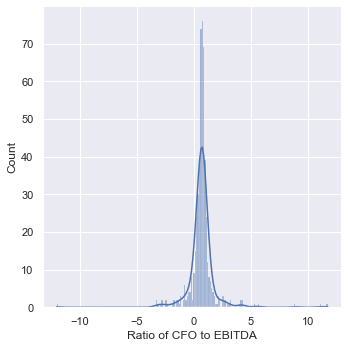

In [61]:
sns.displot(financial_multi['Ratio of CFO to EBITDA'], kde=True)

<AxesSubplot:xlabel='Ratio of CFO to EBITDA'>

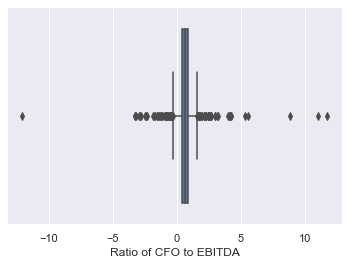

In [62]:
sns.boxplot(x=financial_multi['Ratio of CFO to EBITDA'])

As we can infer from the graphs above, there exists extreme values or outliers in the 'Ratio of CFO to EBITDA' column of the *financial_multi* dataframe. Most of the data points are centered around the mean of 0.6488. While there are some values which are beyond +5 and -5.


So for outlier detection and removal, *Interquartile Range (IQR)* would be used to trim extreme values from 'Ratio of CFO to EBITDA' column. This will be done by trimming values which are below Quartile 1 value and above Quartile 3 value.

In [63]:
cfo_ebitda_25, cfo_ebitda_75 = financial_multi['Ratio of CFO to EBITDA'].quantile([0.25,0.75])

IQR_cfo_ebitda = cfo_ebitda_75 - cfo_ebitda_25

print('Quartile 1 for Ratio of CFO to EBITDA is', cfo_ebitda_25)
print('Quartile 3 for Ratio of CFO to EBITDA is', cfo_ebitda_75)
print('Interquartile Range (IQR) is', IQR_cfo_ebitda)

Quartile 1 for Ratio of CFO to EBITDA is 0.4183784535
Quartile 3 for Ratio of CFO to EBITDA is 0.89291594325
Interquartile Range (IQR) is 0.47453748975


In [64]:
lower_cfo_ebitda = cfo_ebitda_25 - (1.5 * IQR_cfo_ebitda)
upper_cfo_ebitda = cfo_ebitda_75 + (1.5 * IQR_cfo_ebitda)
lower_cfo_ebitda, upper_cfo_ebitda

(-0.293427781125, 1.604722177875)

In [65]:
print('Size', len(financial_multi[financial_multi['Ratio of CFO to EBITDA'] < lower_cfo_ebitda]))
financial_multi[financial_multi['Ratio of CFO to EBITDA'] < lower_cfo_ebitda]

Size 42


Finance Cost  ...  Debt-to-Equity ratio
stock      year                ...                      
AAVAS      2019      25536.71  ...              1.988683
           2020      35607.15  ...              2.565482
           2021      45824.27  ...              2.656487
           2022      47750.34  ...              2.854865
ABCAPITAL  2018       3023.65  ...              4.640019
           2019       4109.06  ...              5.278850
           2022       3479.53  ...              3.418551
ANURAS     2022        308.27  ...              0.484243
ASHOKLEY   2016        925.05  ...              1.513784
           2019       1502.24  ...              1.542405
           2021       1900.64  ...              2.637062
BANDHANBNK 2018     884846.00  ...              0.030377
CENTRUM    2019      15457.74  ...              2.772852
           2020      19887.71  ...              2.157156
           2022      32998.70  ...              1.143893
GEOJITFSL  2019        248.02  ...              0.037497
           2021        309.17  ...              0.055363
GRSE       2019        511.31  ...              0.000000
           2022         76.41  ...              0.008907
HAL        2019      16960.00  ...              0.343906
IIFL       2018      27220.14  ...              5.498571
           2021      26258.27  ...              6.041271
KNRCON     2022      14811.39  ...              0.571883
KOTAKBANK  2018   36176207.00  ...              1.160745
MUTHOOTFIN 2017      23685.93  ...              3.355030
           2019      24996.59  ...              2.964748
           2020      31400.77  ...              3.390948
           2021      40703.33  ...              3.182594
NATIONALUM 2020          5.74  ...              0.006787
ORISSAMINE 2016          0.00  ...              0.000000
           2017          0.00  ...              0.000000
PFC        2016      16645.38  ...              5.837041
           2018      30288.83  ...              8.145446
           2019      34626.80  ...              8.860809
           2020      40844.65  ...              9.421939
           2021      44683.52  ...              8.424528
PILANIINVS 2020       4307.26  ...              0.082177
           2021       5210.54  ...              0.082245
           2022       5893.60  ...              0.096043
RBLBANK    2018    4003113.00  ...              1.386328
           2020    8764872.00  ...              1.609752
UNIONBANK  2017     177105.87  ...              1.711051

[42 rows x 9 columns]

In [66]:
print('Size', len(financial_multi[financial_multi['Ratio of CFO to EBITDA'] > upper_cfo_ebitda]))
financial_multi[financial_multi['Ratio of CFO to EBITDA'] > upper_cfo_ebitda]

Size 36


Finance Cost  ...  Debt-to-Equity ratio
stock      year                ...                      
ARVINDFASN 2022  1.239200e+02  ...              1.126351
AUTOAXLES  2020  1.807000e+01  ...              0.066391
DEEPAKFERT 2017  1.214700e+04  ...              0.994432
           2019  2.293300e+04  ...              1.415802
FINOPB     2022  6.190100e+04  ...              0.520298
GMRINFRA   2016  2.196490e+03  ...              5.477874
           2019  2.684150e+03  ...             19.348574
           2022  2.018660e+03  ...             13.884581
GRSE       2020  1.335600e+02  ...              0.000000
           2021  6.819000e+01  ...              0.003248
HAL        2021  2.591700e+04  ...              0.003454
HEG        2016  6.031300e+03  ...              0.784878
           2017  5.471760e+03  ...              0.717838
           2020  3.651170e+03  ...              0.169222
           2021  1.136830e+03  ...              0.085279
ICICIBANK  2017  1.157318e+08  ...              1.799514
           2019  1.218236e+08  ...              1.840856
           2020  1.144124e+08  ...              1.739197
           2021  8.939429e+07  ...              0.913143
JSL        2016  1.029970e+03  ...              6.026646
           2017  7.878800e+02  ...              3.234910
KOLTEPATIL 2021  7.030000e+03  ...              0.758414
           2022  5.003000e+03  ...              0.558893
KOTAKBANK  2020  3.872147e+07  ...              0.976760
ORISSAMINE 2022  3.000260e+03  ...             94.431137
PETRONET   2016  2.387500e+04  ...              0.392430
PILANIINVS 2019  1.889920e+03  ...              0.047964
PUNJABCHEM 2017  3.068000e+03  ...              2.591368
RAYMOND    2021  2.760390e+04  ...              1.107133
RBLBANK    2017  5.310246e+06  ...              1.840207
           2021  9.097476e+06  ...              0.886304
           2022  6.105425e+06  ...              0.885660
UNIONBANK  2016  1.816881e+05  ...              1.329246
           2021  3.276494e+05  ...              0.802039
           2022  2.706588e+05  ...              0.723178
USHAMART   2016  5.466300e+04  ...              3.222298

[36 rows x 9 columns]

In [67]:
financial_multi['Ratio of CFO to EBITDA'] = financial_multi['Ratio of CFO to EBITDA'][
                                            (financial_multi['Ratio of CFO to EBITDA'] > lower_cfo_ebitda)
                                            &
                                            (financial_multi['Ratio of CFO to EBITDA'] < upper_cfo_ebitda)]

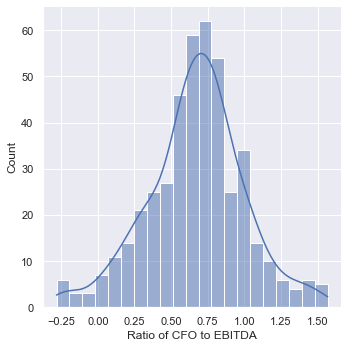

In [68]:
sns.displot(financial_multi['Ratio of CFO to EBITDA'], kde=True)

<AxesSubplot:xlabel='Ratio of CFO to EBITDA'>

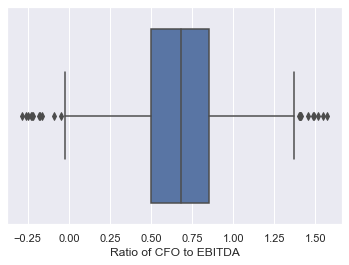

In [69]:
sns.boxplot(x=financial_multi['Ratio of CFO to EBITDA'])

* #### Cleaning Debt-to-Equity ratio data

**PART A**

In [70]:
financial_multi[['Debt-to-Equity ratio','Equity']][financial_multi['Equity'] < 0]

Debt-to-Equity ratio    Equity
stock year                                
SPARC 2020             -3.666885  -1863.83
      2021             -1.404928 -16825.16

In [71]:
# If Equity is negative -> Debt-to-Equity ratio is not applicable
# Insert NaN values (i.e. blank values)
financial_multi['Debt-to-Equity ratio'] = financial_multi['Debt-to-Equity ratio'].mask(financial_multi['Equity'] < 0)
financial_multi[['Debt-to-Equity ratio','Equity']][financial_multi['Equity'] < 0]

Debt-to-Equity ratio    Equity
stock year                                
SPARC 2020                   NaN  -1863.83
      2021                   NaN -16825.16

In [72]:
# Debt cannot be Negative
financial_multi[financial_multi['Debt'] < 0]

,,Finance Cost,Depreciation and Amortisation,Profit or Loss before Tax,Cash flow from Operations CFO,EBITDA,Ratio of CFO to EBITDA,Debt,Equity,Debt-to-Equity ratio
stock,year,,,,,,,,,


**PART B**

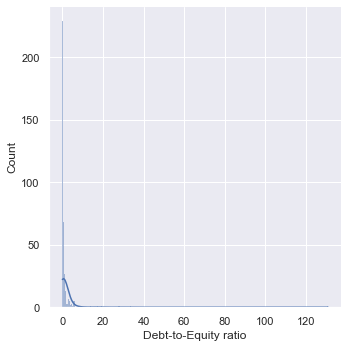

In [73]:
sns.displot(financial_multi['Debt-to-Equity ratio'], kde=True)

<AxesSubplot:xlabel='Debt-to-Equity ratio'>

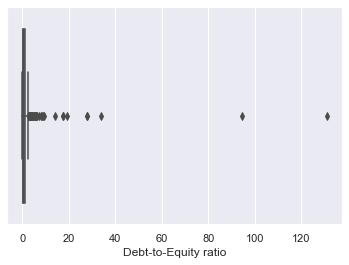

In [74]:
sns.boxplot(x=financial_multi['Debt-to-Equity ratio'])

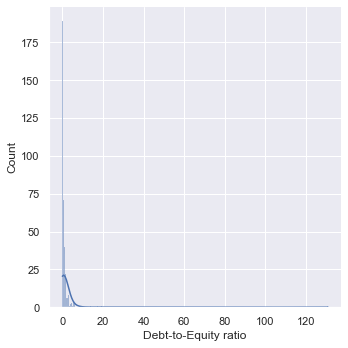

In [75]:
# Debt-to-Equity ratio that are not equal to zero
sns.displot(financial_multi['Debt-to-Equity ratio'][financial_multi['Debt-to-Equity ratio'] != 0], kde=True)

As we know, the lowest value a Debt-to-Equity ratio can be is 0 (there's no negative Debt-to-Equity ratio). Therefore, the Histogram and the Boxplot projected values of 'Debt-to-Equity ratio' bounded by 0 on the lower end. Also, an ideal Debt-to-Equity ratio is considered to be 2:1 (i.e. Debt-to-Equity ratio = 2.00) and most of them are well below the treshold of 2. But as we can observe in the graphs above, the values are beyond 10, and some are beyond 80.

These are outliers that need to be dealt with by using *Interquartile Range (IQR)*, like the way it was done 'CFO-to-EBITDA ratio' earlier.

In [76]:
debt_equity_25, debt_equity_75 = financial_multi['Debt-to-Equity ratio'].quantile([0.25,0.75])
IQR_debt_equity = debt_equity_75 - debt_equity_25
print('Quartile 1 for Ratio of Debt to Equity is', debt_equity_25)
print('Quartile 3 for Ratio of Debt to Equity is', debt_equity_75)
print('Interquartile Range (IQR) is', IQR_debt_equity)

Quartile 1 for Ratio of Debt to Equity is 0.0447013135
Quartile 3 for Ratio of Debt to Equity is 1.077572798
Interquartile Range (IQR) is 1.0328714845


In [77]:
lower_debt_equity = debt_equity_25 - (1.5 * IQR_debt_equity)
upper_debt_equity = debt_equity_75 + (1.5 * IQR_debt_equity)
lower_debt_equity, upper_debt_equity

(-1.5046059132499998, 2.62688002475)

In [78]:
# Debt-to-Equity ratios below the 1st Quartile
print('Size',len(financial_multi[financial_multi['Debt-to-Equity ratio'] < lower_debt_equity]))
financial_multi[financial_multi['Debt-to-Equity ratio'] < lower_debt_equity]

Size 0


,,Finance Cost,Depreciation and Amortisation,Profit or Loss before Tax,Cash flow from Operations CFO,EBITDA,Ratio of CFO to EBITDA,Debt,Equity,Debt-to-Equity ratio
stock,year,,,,,,,,,


In [79]:
# Debt-to-Equity ratios above the 3rd Quartile
print('Size',len(financial_multi[financial_multi['Debt-to-Equity ratio'] > upper_debt_equity]))
financial_multi[financial_multi['Debt-to-Equity ratio'] > upper_debt_equity]

Size 55


Finance Cost  ...  Debt-to-Equity ratio
stock      year                ...                      
AAVAS      2021      45824.27  ...              2.656487
           2022      47750.34  ...              2.854865
ABCAPITAL  2018       3023.65  ...              4.640019
           2019       4109.06  ...              5.278850
           2020       4633.81  ...              4.027701
           2021       3915.76  ...              3.483435
           2022       3479.53  ...              3.418551
ARVINDFASN 2020        273.55  ...              3.156622
           2021        180.29  ...              2.967399
ASHOKLEY   2021       1900.64  ...              2.637062
           2022       1869.05  ...              2.810777
CENTRUM    2019      15457.74  ...              2.772852
GMRINFRA   2016       2196.49  ...              5.477874
           2017       2128.00  ...              2.774625
           2018       2316.34  ...              3.737118
           2019       2684.15  ...             19.348574
           2020       3545.07  ...            130.937700
           2021       1803.00  ...             27.958098
           2022       2018.66  ...             13.884581
IIFL       2016      16799.95  ...              3.893658
           2017      17793.52  ...              4.316364
           2018      27220.14  ...              5.498571
           2019      25850.43  ...              6.083700
           2020      24050.18  ...              5.874601
           2021      26258.27  ...              6.041271
           2022      29910.05  ...              5.577646
JSL        2016       1029.97  ...              6.026646
           2017        787.88  ...              3.234910
MUTHOOTFIN 2016      22856.23  ...              3.331151
           2017      23685.93  ...              3.355030
           2018      20882.87  ...              2.979288
           2019      24996.59  ...              2.964748
           2020      31400.77  ...              3.390948
           2021      40703.33  ...              3.182594
           2022      42296.70  ...              2.839658
ORISSAMINE 2020       2145.27  ...              5.430946
           2021       3173.21  ...             17.272045
           2022       3000.26  ...             94.431137
PFC        2016      16645.38  ...              5.837041
           2017      16767.64  ...              5.662813
           2018      30288.83  ...              8.145446
           2019      34626.80  ...              8.860809
           2020      40844.65  ...              9.421939
           2021      44683.52  ...              8.424528
           2022      44708.78  ...              7.165420
PUNJABCHEM 2016       4966.00  ...              3.125245
SHOPERSTOP 2020        197.32  ...             33.713385
           2021        222.96  ...             17.588073
           2022        206.60  ...             27.859608
SPARC      2022       1332.87  ...              4.938679
TATAMOTORS 2022       9311.86  ...              2.999020
USHAMART   2016      54663.00  ...              3.222298
           2017      56424.00  ...              4.457777
           2018       9248.00  ...              5.353441
           2019      11353.00  ...              4.377012

[55 rows x 9 columns]

In [80]:
financial_multi['Debt-to-Equity ratio'] = financial_multi['Debt-to-Equity ratio'][
                                          (financial_multi['Debt-to-Equity ratio'] > lower_debt_equity)
                                          &
                                          (financial_multi['Debt-to-Equity ratio'] < upper_debt_equity)]

In [81]:
print('Size',len(financial_multi[financial_multi['Debt-to-Equity ratio'] > upper_debt_equity]))
financial_multi[financial_multi['Debt-to-Equity ratio'] > upper_debt_equity]

Size 0


,,Finance Cost,Depreciation and Amortisation,Profit or Loss before Tax,Cash flow from Operations CFO,EBITDA,Ratio of CFO to EBITDA,Debt,Equity,Debt-to-Equity ratio
stock,year,,,,,,,,,


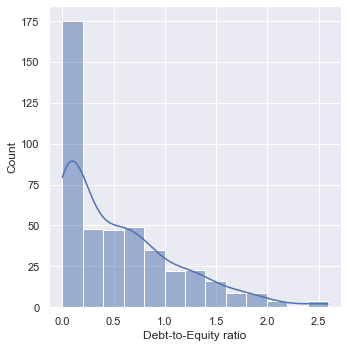

In [82]:
sns.displot(financial_multi['Debt-to-Equity ratio'][financial_multi['Debt-to-Equity ratio'] != 0], kde=True)

<AxesSubplot:xlabel='Debt-to-Equity ratio'>

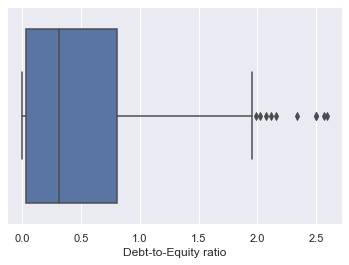

In [83]:
sns.boxplot(x=financial_multi['Debt-to-Equity ratio'])

* #### Removing financial data of the stocks whose listing year price returns is to be ignored

In [84]:
late_listed_ignore

[(2018, 'BANDHANBNK'),
 (2019, 'AAVAS'),
 (2017, 'LAURUSLABS'),
 (2018, 'NAM-INDIA'),
 (2020, 'SUMICHEM'),
 (2021, 'ANURAS'),
 (2018, 'ASTERDM'),
 (2021, 'CAMS'),
 (2021, 'RAILTEL'),
 (2019, 'ARVINDFASN'),
 (2021, 'CRAFTSMAN'),
 (2022, 'FINOPB'),
 (2019, 'GRSE'),
 (2020, 'GREENPANEL'),
 (2018, 'NEWGEN'),
 (2022, 'RATEGAIN'),
 (2018, 'SHALBY')]

In [85]:
for year_n_stock in late_listed_ignore:
    financial_multi.loc[pd.IndexSlice[year_n_stock[1],year_n_stock[0]],:] = np.nan
    
financial_multi.loc[ignore_listingyear]

Finance Cost  ...  Debt-to-Equity ratio
stock      year                ...                      
BANDHANBNK 2018           NaN  ...                   NaN
           2019     516019.00  ...              0.046542
           2020   12757878.00  ...              1.077899
           2021    9979534.00  ...              0.974275
           2022    8389024.00  ...              1.146140
AAVAS      2019           NaN  ...                   NaN
           2020      35607.15  ...              2.565482
           2021      45824.27  ...                   NaN
           2022      47750.34  ...                   NaN
LAURUSLABS 2016        108.68  ...              1.199475
           2017           NaN  ...                   NaN
           2018         78.88  ...              0.660922
           2019         87.30  ...              0.664735
           2020         88.62  ...              0.609921
           2021         66.85  ...              0.622759
           2022        100.67  ...              0.595892
NAM-INDIA  2018           NaN  ...                   NaN
           2019          0.00  ...              0.000000
           2020          5.67  ...              0.031403
           2021          4.43  ...              0.016601
           2022          3.82  ...              0.013563
SUMICHEM   2020           NaN  ...                   NaN
           2021         55.55  ...              0.021174
           2022         61.67  ...              0.019502
ANURAS     2021           NaN  ...                   NaN
           2022        308.27  ...              0.484243
ASTERDM    2018           NaN  ...                   NaN
           2019        179.18  ...              0.757765
           2020        359.67  ...              1.507238
           2021        293.66  ...              1.252869
           2022        257.02  ...              1.094701
CAMS       2021           NaN  ...                   NaN
           2022        713.39  ...              0.126514
RAILTEL    2021           NaN  ...                   NaN
           2022        549.00  ...              0.020639
ARVINDFASN 2019           NaN  ...                   NaN
           2020        273.55  ...                   NaN
           2021        180.29  ...                   NaN
           2022        123.92  ...              1.126351
CRAFTSMAN  2021           NaN  ...                   NaN
           2022       8422.00  ...              0.703990
FINOPB     2022           NaN  ...                   NaN
GRSE       2019           NaN  ...                   NaN
           2020        133.56  ...              0.000000
           2021         68.19  ...              0.003248
           2022         76.41  ...              0.008907
GREENPANEL 2020           NaN  ...                   NaN
           2021       3721.00  ...              0.662229
           2022       1709.81  ...              0.331628
NEWGEN     2018           NaN  ...                   NaN
           2019        853.87  ...              0.162929
           2020       1091.21  ...              0.201861
           2021        562.58  ...              0.030181
           2022        349.16  ...              0.034291
RATEGAIN   2022           NaN  ...                   NaN
SHALBY     2018           NaN  ...                   NaN
           2019         80.78  ...              0.090819
           2020         63.58  ...              0.083968
           2021         36.19  ...              0.064847
           2022         59.01  ...              0.198673

[60 rows x 9 columns]

In [86]:
financial_multi.loc[pd.IndexSlice[late_listed_ignore[0][1],2018],:]

Finance Cost                    NaN
Depreciation and Amortisation   NaN
Profit or Loss before Tax       NaN
Cash flow from Operations CFO   NaN
EBITDA                          NaN
Ratio of CFO to EBITDA          NaN
Debt                            NaN
Equity                          NaN
Debt-to-Equity ratio            NaN
Name: (BANDHANBNK, 2018), dtype: float64

* #### Creating a variable representing the YoY EBITDA growth of stocks

In [87]:
ebitda_growth = pd.DataFrame(financial_multi['EBITDA']).unstack(level=0)
ebitda_growth = ebitda_growth.pct_change(1, fill_method=None)
ebitda_growth = pd.DataFrame(ebitda_growth.stack())
ebitda_growth = ebitda_growth.swaplevel(0)
ebitda_growth.rename(columns={'EBITDA':'EBITDA_growth'}, inplace=True)
ebitda_growth

,,EBITDA_growth
stock,year,
3MINDIA,2017,0.180535
AIAENG,2017,0.039037
AMRUTANJAN,2017,-0.039389
ASHOKLEY,2017,0.299920
AUTOAXLES,2017,0.200270
...,...,...
TRIDENT,2022,0.901771
UFLEX,2022,0.247944
UNIONBANK,2022,0.845643


* #### Removing outliers from 'ebitda_growth' dataframe

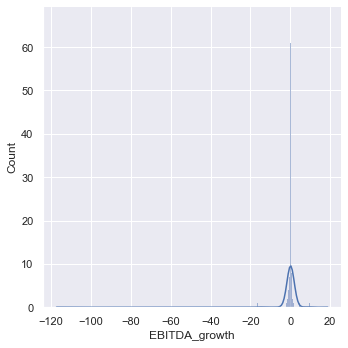

In [88]:
sns.displot(ebitda_growth['EBITDA_growth'], kde=True)

<AxesSubplot:xlabel='EBITDA_growth'>

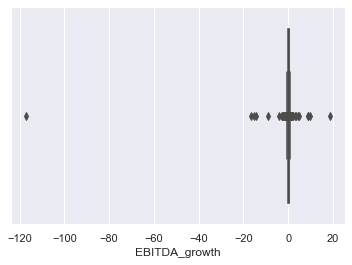

In [89]:
sns.boxplot(x=ebitda_growth['EBITDA_growth'])

The boxplot and histogram of EBITDA growth show the presence of outliers. These need to be removed using *Interquartile Range (IQR)* method.

In [90]:
ebitda_25, ebitda_75 = ebitda_growth['EBITDA_growth'].quantile([0.25,0.75])
IQR_ebitda = ebitda_75 - ebitda_25
print('Quartile 1 for EBITDA growth is', ebitda_25)
print('Quartile 3 for EBITDA growth is', ebitda_75)
print('Interquartile Range (IQR) is', IQR_ebitda)

Quartile 1 for EBITDA growth is -0.08732049125371416
Quartile 3 for EBITDA growth is 0.3068326803587277
Interquartile Range (IQR) is 0.39415317161244184


In [91]:
lower_ebitda_growth = ebitda_25 - (1.5 * IQR_ebitda)
upper_ebitda_growth = ebitda_75 + (1.5 * IQR_ebitda)
lower_ebitda_growth, upper_ebitda_growth

(-0.6785502486723769, 0.8980624377773905)

In [92]:
# EBITDA growth values below the 1st Quartile
print('Size',len(ebitda_growth[ebitda_growth['EBITDA_growth'] < lower_ebitda_growth]))
ebitda_growth[ebitda_growth['EBITDA_growth'] < lower_ebitda_growth]

Size 28


,,EBITDA_growth
stock,year,
SPARC,2017,-2.366892
ORISSAMINE,2018,-15.072108
UNIONBANK,2018,-2.825069
USHAMART,2018,-1.217816
GMRINFRA,2019,-0.897997
HATHWAY,2019,-1.140706
JINDALPOLY,2019,-1.137817
RELINFRA,2019,-0.938286
USHAMART,2019,-0.940418


In [93]:
# EBITDA growth values above the 3rd Quartile
print('Size',len(ebitda_growth[ebitda_growth['EBITDA_growth'] > upper_ebitda_growth]))
ebitda_growth[ebitda_growth['EBITDA_growth'] > upper_ebitda_growth]

Size 32


,,EBITDA_growth
stock,year,
GMRINFRA,2017,3.256770
HATHWAY,2017,1.011289
JSL,2017,1.051496
HEG,2018,18.731652
JUBLFOOD,2018,0.900531
PFC,2018,0.906609
PUNJABCHEM,2018,1.029049
SHOPERSTOP,2018,2.190279
SPARC,2018,1.180842


In [94]:
ebitda_growth = ebitda_growth[(ebitda_growth['EBITDA_growth'] > lower_ebitda_growth)
                              &
                              (ebitda_growth['EBITDA_growth'] < upper_ebitda_growth)]
ebitda_growth

,,EBITDA_growth
stock,year,
3MINDIA,2017,0.180535
AIAENG,2017,0.039037
AMRUTANJAN,2017,-0.039389
ASHOKLEY,2017,0.299920
AUTOAXLES,2017,0.200270
...,...,...
TORNTPHARM,2022,-0.155247
UFLEX,2022,0.247944
UNIONBANK,2022,0.845643


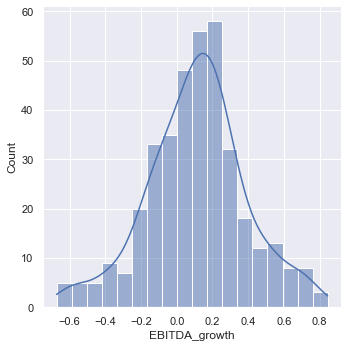

In [95]:
sns.displot(ebitda_growth['EBITDA_growth'], kde=True)

<AxesSubplot:xlabel='EBITDA_growth'>

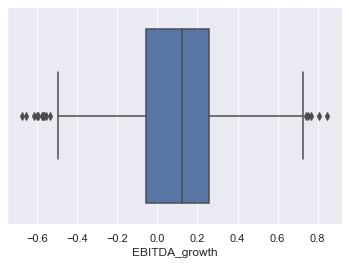

In [96]:
sns.boxplot(x=ebitda_growth['EBITDA_growth'])

* #### Creating a variable representing the YoY Cash Flow from Operations (CFO) growth of stocks

In [97]:
cfo_growth = pd.DataFrame(financial_multi['Cash flow from Operations CFO'])
cfo_growth.rename(columns={'Cash flow from Operations CFO' : 'CFO_growth'}, inplace=True)
cfo_growth = cfo_growth.unstack(level=0)
cfo_growth = cfo_growth.pct_change(1, fill_method=None)
cfo_growth = cfo_growth.stack().swaplevel(0)
cfo_growth

,,CFO_growth
stock,year,
3MINDIA,2017,0.398712
AIAENG,2017,-0.604911
AMRUTANJAN,2017,-0.613125
ASHOKLEY,2017,-1.211898
AUTOAXLES,2017,0.706036
...,...,...
TRIDENT,2022,0.787535
UFLEX,2022,-0.410754
UNIONBANK,2022,0.770267


* #### Removing outliers from 'cfo_growth' dataframe

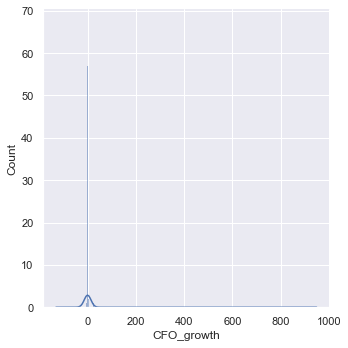

In [98]:
sns.displot(cfo_growth['CFO_growth'], kde=True)

<AxesSubplot:xlabel='CFO_growth'>

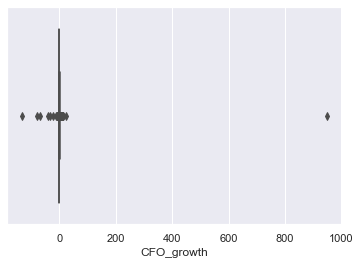

In [99]:
sns.boxplot(x=cfo_growth['CFO_growth'])

In [100]:
cfo_25, cfo_75 = cfo_growth['CFO_growth'].quantile([0.25,0.75])

IQR_cfo = cfo_75 - cfo_25

print('Quartile 1 for CFO growth is', cfo_25)
print('Quartile 3 for CFO growth is', cfo_75)
print('Interquartile Range (IQR) is', IQR_cfo)

Quartile 1 for CFO growth is -0.4212927721163648
Quartile 3 for CFO growth is 0.4618082586644352
Interquartile Range (IQR) is 0.8831010307808


In [101]:
lower_cfo_growth = cfo_25 - (1.5 * IQR_cfo)
upper_cfo_growth = cfo_75 + (1.5 * IQR_cfo)
lower_cfo_growth, upper_cfo_growth

(-1.745944318287565, 1.7864598048356353)

In [102]:
# CFO growth values below the 1st Quartile
print('Size',len(cfo_growth[cfo_growth['CFO_growth'] < lower_cfo_growth]))
cfo_growth[cfo_growth['CFO_growth'] < lower_cfo_growth]

Size 26


,,CFO_growth
stock,year,
DEEPAKFERT,2017,-8.213907
MUTHOOTFIN,2017,-21.182568
SPARC,2017,-3.896023
UNIONBANK,2017,-1.820189
KOTAKBANK,2018,-1.785963
PFC,2018,-32.828924
UNIONBANK,2018,-1.920435
ASHOKLEY,2019,-3.561141
DEEPAKFERT,2019,-10.961296


In [103]:
# CFO growth values above the 3rd Quartile
print('Size',len(cfo_growth[cfo_growth['CFO_growth'] > upper_cfo_growth]))
cfo_growth[cfo_growth['CFO_growth'] > upper_cfo_growth]

Size 37


,,CFO_growth
stock,year,
DCMSHRIRAM,2017,6.707843
HATHWAY,2017,2.895008
IIFL,2017,12.976892
JSL,2017,4.296276
KOLTEPATIL,2017,2.915180
NUCLEUS,2017,1.925561
STAR,2017,2.933948
ASHOKLEY,2018,4.414402
HEG,2018,2.782864


In [104]:
cfo_growth = cfo_growth[(cfo_growth['CFO_growth'] > lower_cfo_growth)
                        &
                        (cfo_growth['CFO_growth'] < upper_cfo_growth)]
cfo_growth

,,CFO_growth
stock,year,
3MINDIA,2017,0.398712
AIAENG,2017,-0.604911
AMRUTANJAN,2017,-0.613125
ASHOKLEY,2017,-1.211898
AUTOAXLES,2017,0.706036
...,...,...
TRIDENT,2022,0.787535
UFLEX,2022,-0.410754
UNIONBANK,2022,0.770267


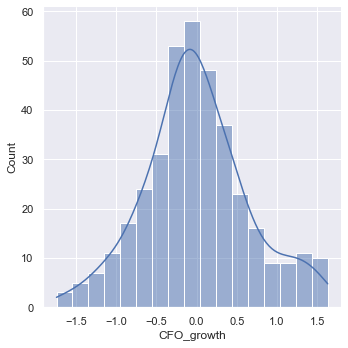

In [105]:
sns.displot(cfo_growth['CFO_growth'], kde=True)

<AxesSubplot:xlabel='CFO_growth'>

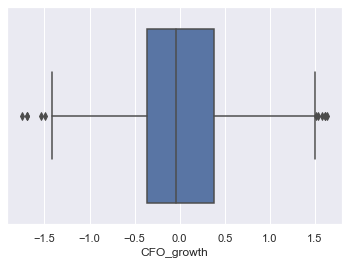

In [106]:
sns.boxplot(x=cfo_growth['CFO_growth'])

-------
## Combining the variables and saving the data in Comma Seperated Values (.csv) files for analysis in Part 3

In [107]:
returns_multi = returns_annual.copy()
returns_multi = pd.DataFrame(returns_multi.unstack())
returns_multi = returns_multi.sort_index()
returns_multi.rename(columns={returns_multi.columns[0]:'average_return'}, inplace=True)
returns_multi.index.names = ['stock', 'year']
returns_multi.to_csv('../Assignment/data/returns_multi_df.csv')
returns_multi

average_return
stock    year                
3MINDIA  2016        0.001560
         2017        0.000474
         2018        0.002309
         2019        0.001046
         2020       -0.000725
...                       ...
USHAMART 2018        0.000806
         2019        0.004201
         2020       -0.003194
         2021        0.003543
         2022        0.006334

[630 rows x 1 columns]

In [108]:
risks_multi = risks_annual.copy()
risks_multi = pd.DataFrame(risks_multi.unstack())
risks_multi = risks_multi.sort_index()
risks_multi.index.names = ['stock', 'year']
risks_multi.columns = ['total_risk']
risks_multi.to_csv('../Assignment/data/risks_multi_df.csv')
risks_multi

total_risk
stock    year            
3MINDIA  2016    0.024845
         2017    0.018672
         2018    0.020509
         2019    0.018940
         2020    0.023162
...                   ...
USHAMART 2018    0.035508
         2019    0.043226
         2020    0.035540
         2021    0.035950
         2022    0.036940

[630 rows x 1 columns]

In [109]:
financial_ratios = financial_multi[['Ratio of CFO to EBITDA', 'Debt-to-Equity ratio']]
financial_ratios.columns = ['ratio_cfo_ebitda', 'ratio_debt_equity']
financial_ratios = financial_ratios.sort_index()
financial_ratios.to_csv('../Assignment/data/financial_ratios_df.csv')
financial_ratios

ratio_cfo_ebitda  ratio_debt_equity
stock    year                                     
3MINDIA  2016          0.736428           0.011283
         2017          0.872528           0.007976
         2018          0.064635           0.009445
         2019          0.418120           0.009628
         2020          0.494484           0.024061
...                         ...                ...
USHAMART 2018               NaN                NaN
         2019               NaN                NaN
         2020          0.276524           0.490176
         2021          0.693561           0.376541
         2022          0.352307           0.242379

[541 rows x 2 columns]

In [110]:
financial_growths = pd.merge(ebitda_growth,cfo_growth, on=ebitda_growth.index.names, how='outer')
financial_growths = financial_growths.sort_index()
financial_growths.to_csv('../Assignment/data/financial_growths_df.csv')
financial_growths

EBITDA_growth  CFO_growth
stock    year                           
3MINDIA  2017       0.180535    0.398712
         2018       0.338932   -0.900814
         2019       0.080450         NaN
         2020      -0.180953   -0.031366
         2021      -0.426464    0.310260
...                      ...         ...
USHAMART 2018            NaN    0.332361
         2019            NaN    0.066374
         2020            NaN   -0.782001
         2021      -0.598896    0.006026
         2022       0.460762   -0.257978

[415 rows x 2 columns]

#### Continued in Part 3...

-----
## References:
* ***Data-Driven Investing with Python | Financial Data Science*** - by Fervent #LearnWithDistinction  
(https://www.udemy.com/course/data-driven-investing-with-python-financial-data-science/)
* ***Feature Engineering – How to Detect and Remove Outliers (with Python Code)*** - by Chirag Goyal  
(https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)